# Acá iré haciendo un intento de leer las señales adquiridas

In [5]:
# para tener las librerías necesarias, crea el enviromet desde el yml llamado enviroment_lab3.yml

Datasets disponibles: ['98:D3:81:FD:6D:86']
Forma de los datos: (5,)


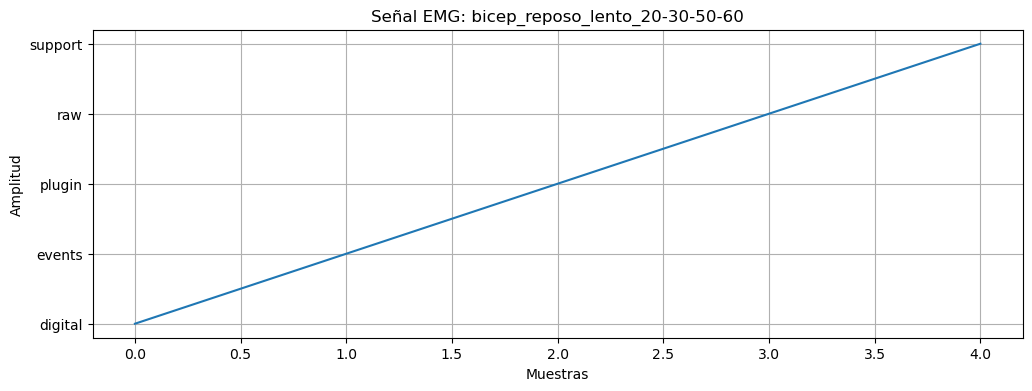

In [6]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

# Ruta relativa correcta desde Codigos_intento
ruta = '../Señales adquiridas en el laboratorio/bicep_reposo_lento_20-30-50-60.h5'

# el os para ver no es necesario en si.
if not os.path.exists(ruta):
    print(f"Archivo no encontrado: {ruta}")
    data = None
else:
    with h5py.File(ruta, 'r') as f:
        print("Datasets disponibles:", list(f.keys()))
        data_key = list(f.keys())[0]
        data = np.array(f[data_key])
        print("Forma de los datos:", data.shape)

if data is not None:
    plt.figure(figsize=(12, 4))
    plt.plot(data)
    plt.title('Señal EMG: bicep_reposo_lento_20-30-50-60')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

Forma de los datos (txt): (66900, 6)


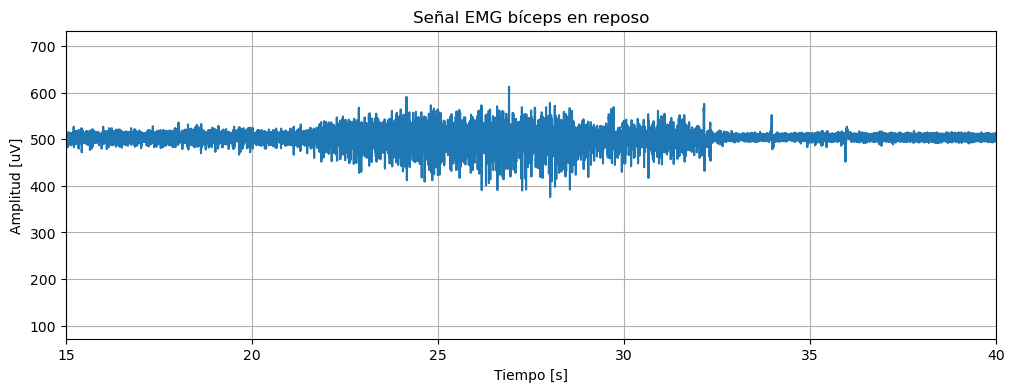

In [7]:
# Ruta del archivo
ruta2 = '../Señales adquiridas en el laboratorio/bicep_reposo_lento_20-30-50-60.txt'

# Cargar datos
data_txt = np.loadtxt(ruta2)
print("Forma de los datos (txt):", data_txt.shape)

# Sampling rate del dispositivo
fs = 1000  # Hz

# Extraer la columna del EMG (A1 es la última columna -> índice -1)
emg = data_txt[:, -1]

# Crear vector de tiempo
t = np.arange(len(emg)) / fs

# Graficar
plt.figure(figsize=(12, 4))
plt.plot(t, emg, label="EMG bíceps (A1)")
plt.title('Señal EMG bíceps en reposo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [uV]')
plt.xlim(15, 40)
plt.grid(True)
plt.show()


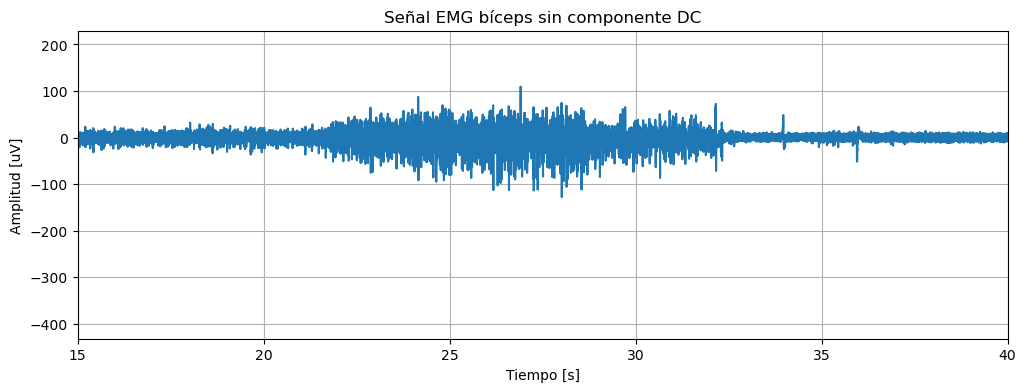

In [8]:
# Quitar la componente DC
emg_dc = emg - np.mean(emg)

# Graficar señal sin DC
plt.figure(figsize=(12, 4))
plt.plot(t, emg_dc, label="EMG bíceps (sin DC)")
plt.title('Señal EMG bíceps sin componente DC')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [uV]')
plt.xlim(15, 40)
plt.grid(True)
plt.show()


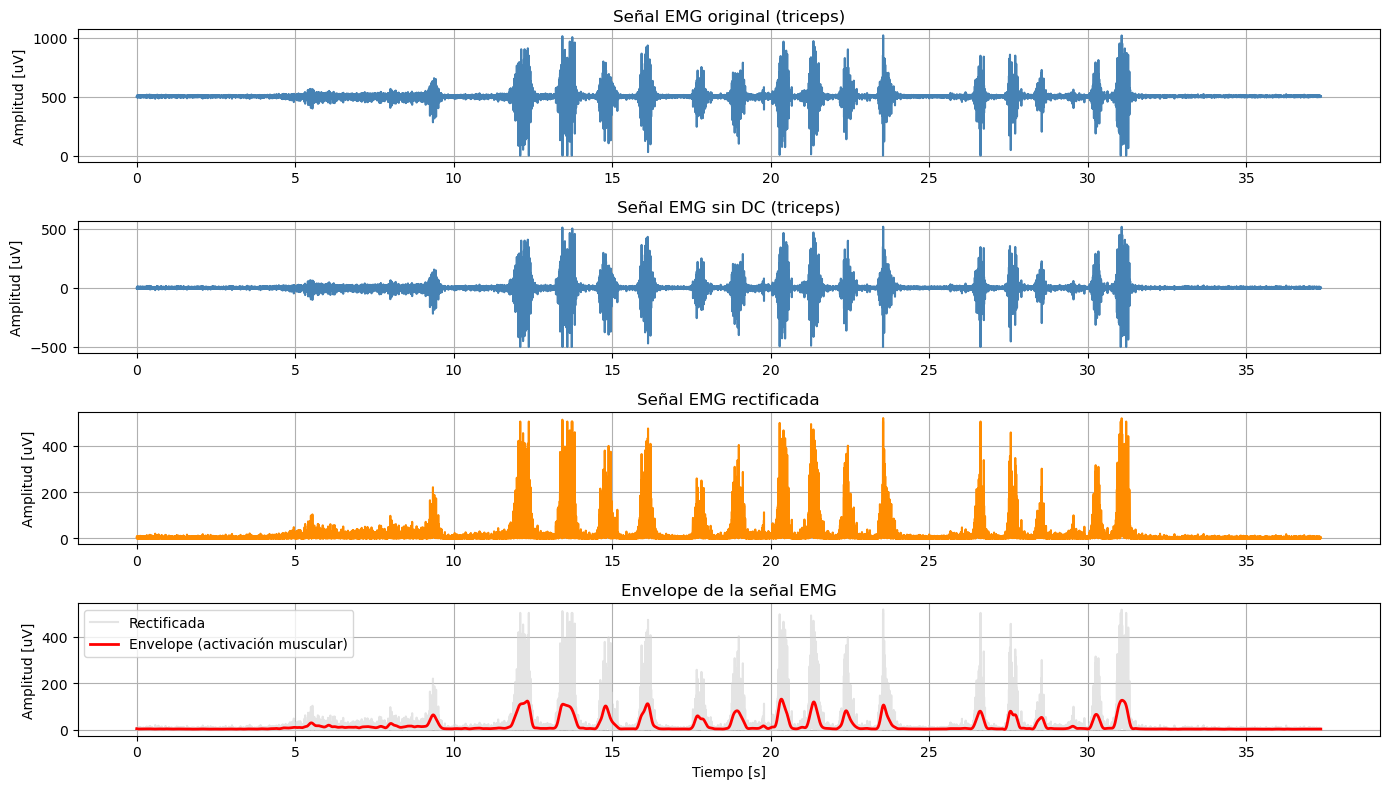

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Acá por ejemplo haré un procesamiento básico de una señal EMG para la señal del triceps
# --- Datos ---
#ruta2 = '../Señales adquiridas en el laboratorio/bicep_reposo_lento_20-30-50-60.txt'
ruta2 = '../Señales adquiridas en el laboratorio/tricep_1-09-03_12-51-37.txt'

data_txt = np.loadtxt(ruta2)
fs = 1000  # Hz

# Extraer canal EMG (A1)
emg = data_txt[:, -1]

# Vector de tiempo
t = np.arange(len(emg)) / fs

# --- Preprocesamiento ---
# 1. Quitar componente DC
emg_dc = emg - np.mean(emg)

# 2. Rectificación (valor absoluto)
emg_rect = np.abs(emg_dc)

# 3. Envelope con filtro pasa-bajas
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

cutoff = 5  # Hz (suave para obtener envelope)
b, a = butter_lowpass(cutoff, fs)
emg_envelope = filtfilt(b, a, emg_rect)

# --- Gráficas ---
plt.figure(figsize=(14, 8))

# Señal original
plt.subplot(4, 1, 1)
plt.plot(t, emg, color='steelblue')
plt.title("Señal EMG original (triceps)")
plt.ylabel("Amplitud [uV]")
plt.grid(True)

# Señal cruda sin DC
plt.subplot(4, 1, 2)
plt.plot(t, emg_dc, color='steelblue')
plt.title("Señal EMG sin DC (triceps)")
plt.ylabel("Amplitud [uV]")
plt.grid(True)

# Señal rectificada
plt.subplot(4, 1, 3)
plt.plot(t, emg_rect, color='darkorange')
plt.title("Señal EMG rectificada")
plt.ylabel("Amplitud [uV]")
plt.grid(True)

# Envelope
plt.subplot(4, 1, 4)
plt.plot(t, emg_rect, color='lightgray', alpha=0.6, label="Rectificada")
plt.plot(t, emg_envelope, color='red', linewidth=2, label="Envelope (activación muscular)")
plt.title("Envelope de la señal EMG")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [uV]")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()